In [1]:
import pandas as pd
from pandas import json_normalize
import json
import numpy as np

df_one = pd.read_json("../src/scripts/square-grid-geojson-correct.json")
df_one['grid1'] = 'grid1'
df_one = df_one.pivot(index="grid1",columns="key",values="value").reset_index().add_prefix('correct_grid_one_')
df_one.rename(columns={list(df_one)[0]:'grid1'}, inplace=True)

df_second = pd.read_json("../src/scripts/square-grid-geojson-second-correct.json")
df_second['grid2'] = 'grid2'
df_second = df_second.pivot(index="grid2",columns="key",values="value").reset_index().add_prefix('correct_grid_two_')
df_second.rename(columns={list(df_second)[0]:'grid2'}, inplace=True)

df_third = pd.read_json("../src/scripts/square-grid-geojson-third-correct.json")
df_third['grid3'] = 'grid3'
df_third = df_third.pivot(index="grid3",columns="key",values="value").reset_index().add_prefix('correct_grid_three_')
df_third.rename(columns={list(df_third)[0]:'grid3'}, inplace=True)

df = pd.read_csv("data/change-study-data-normalized.csv")
df = df.groupby(['uuid', 'category', 'data']).first().reset_index()
df = df.pivot_table(index=['uuid'],columns=['category'],values=['data'], aggfunc='first')
df.to_csv('data/cleaned_normalized_data_temp.csv')
df = pd.read_csv("data/cleaned_normalized_data_temp.csv")
df.iloc[0]
df.columns = df.iloc[0]
df = df[2:]
df['uuid'] = df['category']
df = df.dropna(subset=['gridanswers'])
df = df.dropna(subset=['susanswers'])
# df = df.dropna(subset=['map-version'])
df['index'] = np.arange(len(df))

#grid answers
dictValuesDF = df['gridanswers'].apply(json.loads)
dictValuesDFList = list(dictValuesDF)
data = dictValuesDFList
sdf = pd.Series(data, name='gridanswers').to_frame()
sdf['index'] = np.arange(len(sdf))
sdf = pd.DataFrame(dict(
    index=sdf.index.values.repeat(sdf['gridanswers'].str.len()),
)).join(pd.DataFrame(sdf['gridanswers'].sum()))
sdf['value'] = np.where(sdf['value'] > 0, 1, 0)
sdf = sdf.pivot(index="index",columns="key",values="value").reset_index().add_prefix('submitted_grid_')
sdf.rename(columns={list(sdf)[0]:'index'}, inplace=True)
df = df.join(sdf,on='index',how='left', rsuffix='_right')

#sus answers
dictValuesDF = df['susanswers'].apply(json.loads)
dictValuesDFList = list(dictValuesDF)
data = dictValuesDFList
sdf = pd.Series(data, name='susanswers').to_frame()
sdf['index'] = np.arange(len(sdf))
sdf = pd.DataFrame(dict(
    index=sdf.index.values.repeat(sdf['susanswers'].str.len()),
)).join(pd.DataFrame(sdf['susanswers'].sum()))
sdf = sdf.pivot(index="index",columns="key",values="questionAnswer").reset_index().add_prefix('submitted_sus_')
sdf.rename(columns={list(sdf)[0]:'index'}, inplace=True)
df = df.join(sdf,on='index',how='left', rsuffix='_right')
del df['index_right']

df['grid1'] = 'grid1'
df['grid2'] = 'grid2'
df['grid3'] = 'grid3'

df = pd.merge(df, df_one, left_on="grid1", right_on="grid1", how="left", validate="m:1")
df = pd.merge(df, df_second, left_on="grid2", right_on="grid2", how="left", validate="m:1")
df = pd.merge(df, df_third, left_on="grid3", right_on="grid3", how="left", validate="m:1")

# df['map-version'] = np.where(df['map-version']==,0,df['map-version'])
values = {'map-version': 999}
df = df.fillna(values)
df['map-version'] = df['map-version'].astype(int)

df['iscorrect_grid_box_01'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-1'] == df['correct_grid_one_grid-box-1'], np.where(df['map-version']==1, df['submitted_grid_grid-box-1'] == df['correct_grid_two_grid-box-1'], np.where(df['map-version']==2, df['submitted_grid_grid-box-1'] == df['correct_grid_three_grid-box-1'], '')))
df['iscorrect_grid_box_02'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-2'] == df['correct_grid_one_grid-box-2'], np.where(df['map-version']==1, df['submitted_grid_grid-box-2'] == df['correct_grid_two_grid-box-2'], np.where(df['map-version']==2, df['submitted_grid_grid-box-2'] == df['correct_grid_three_grid-box-2'], '')))
df['iscorrect_grid_box_03'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-3'] == df['correct_grid_one_grid-box-3'], np.where(df['map-version']==1, df['submitted_grid_grid-box-3'] == df['correct_grid_two_grid-box-3'], np.where(df['map-version']==2, df['submitted_grid_grid-box-3'] == df['correct_grid_three_grid-box-3'], '')))
df['iscorrect_grid_box_04'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-4'] == df['correct_grid_one_grid-box-4'], np.where(df['map-version']==1, df['submitted_grid_grid-box-4'] == df['correct_grid_two_grid-box-4'], np.where(df['map-version']==2, df['submitted_grid_grid-box-4'] == df['correct_grid_three_grid-box-4'], '')))
df['iscorrect_grid_box_05'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-5'] == df['correct_grid_one_grid-box-5'], np.where(df['map-version']==1, df['submitted_grid_grid-box-5'] == df['correct_grid_two_grid-box-5'], np.where(df['map-version']==2, df['submitted_grid_grid-box-5'] == df['correct_grid_three_grid-box-5'], '')))
df['iscorrect_grid_box_06'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-6'] == df['correct_grid_one_grid-box-6'], np.where(df['map-version']==1, df['submitted_grid_grid-box-6'] == df['correct_grid_two_grid-box-6'], np.where(df['map-version']==2, df['submitted_grid_grid-box-6'] == df['correct_grid_three_grid-box-6'], '')))
df['iscorrect_grid_box_07'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-7'] == df['correct_grid_one_grid-box-7'], np.where(df['map-version']==1, df['submitted_grid_grid-box-7'] == df['correct_grid_two_grid-box-7'], np.where(df['map-version']==2, df['submitted_grid_grid-box-7'] == df['correct_grid_three_grid-box-7'], '')))
df['iscorrect_grid_box_08'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-8'] == df['correct_grid_one_grid-box-8'], np.where(df['map-version']==1, df['submitted_grid_grid-box-8'] == df['correct_grid_two_grid-box-8'], np.where(df['map-version']==2, df['submitted_grid_grid-box-8'] == df['correct_grid_three_grid-box-8'], '')))
df['iscorrect_grid_box_09'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-9'] == df['correct_grid_one_grid-box-9'], np.where(df['map-version']==1, df['submitted_grid_grid-box-9'] == df['correct_grid_two_grid-box-9'], np.where(df['map-version']==2, df['submitted_grid_grid-box-9'] == df['correct_grid_three_grid-box-9'], '')))

df['iscorrect_grid_box_10'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-10'] == df['correct_grid_one_grid-box-10'], np.where(df['map-version']==1, df['submitted_grid_grid-box-10'] == df['correct_grid_two_grid-box-10'], np.where(df['map-version']==2, df['submitted_grid_grid-box-10'] == df['correct_grid_three_grid-box-10'], '')))
df['iscorrect_grid_box_11'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-11'] == df['correct_grid_one_grid-box-11'], np.where(df['map-version']==1, df['submitted_grid_grid-box-11'] == df['correct_grid_two_grid-box-11'], np.where(df['map-version']==2, df['submitted_grid_grid-box-11'] == df['correct_grid_three_grid-box-11'], '')))
df['iscorrect_grid_box_12'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-12'] == df['correct_grid_one_grid-box-12'], np.where(df['map-version']==1, df['submitted_grid_grid-box-12'] == df['correct_grid_two_grid-box-12'], np.where(df['map-version']==2, df['submitted_grid_grid-box-12'] == df['correct_grid_three_grid-box-12'], '')))
df['iscorrect_grid_box_13'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-13'] == df['correct_grid_one_grid-box-13'], np.where(df['map-version']==1, df['submitted_grid_grid-box-13'] == df['correct_grid_two_grid-box-13'], np.where(df['map-version']==2, df['submitted_grid_grid-box-13'] == df['correct_grid_three_grid-box-13'], '')))
df['iscorrect_grid_box_14'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-14'] == df['correct_grid_one_grid-box-14'], np.where(df['map-version']==1, df['submitted_grid_grid-box-14'] == df['correct_grid_two_grid-box-14'], np.where(df['map-version']==2, df['submitted_grid_grid-box-14'] == df['correct_grid_three_grid-box-14'], '')))
df['iscorrect_grid_box_15'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-15'] == df['correct_grid_one_grid-box-15'], np.where(df['map-version']==1, df['submitted_grid_grid-box-15'] == df['correct_grid_two_grid-box-15'], np.where(df['map-version']==2, df['submitted_grid_grid-box-15'] == df['correct_grid_three_grid-box-15'], '')))
df['iscorrect_grid_box_16'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-16'] == df['correct_grid_one_grid-box-16'], np.where(df['map-version']==1, df['submitted_grid_grid-box-16'] == df['correct_grid_two_grid-box-16'], np.where(df['map-version']==2, df['submitted_grid_grid-box-16'] == df['correct_grid_three_grid-box-16'], '')))
df['iscorrect_grid_box_17'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-17'] == df['correct_grid_one_grid-box-17'], np.where(df['map-version']==1, df['submitted_grid_grid-box-17'] == df['correct_grid_two_grid-box-17'], np.where(df['map-version']==2, df['submitted_grid_grid-box-17'] == df['correct_grid_three_grid-box-17'], '')))
df['iscorrect_grid_box_18'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-18'] == df['correct_grid_one_grid-box-18'], np.where(df['map-version']==1, df['submitted_grid_grid-box-18'] == df['correct_grid_two_grid-box-18'], np.where(df['map-version']==2, df['submitted_grid_grid-box-18'] == df['correct_grid_three_grid-box-18'], '')))
df['iscorrect_grid_box_19'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-19'] == df['correct_grid_one_grid-box-19'], np.where(df['map-version']==1, df['submitted_grid_grid-box-19'] == df['correct_grid_two_grid-box-19'], np.where(df['map-version']==2, df['submitted_grid_grid-box-19'] == df['correct_grid_three_grid-box-19'], '')))

df['iscorrect_grid_box_20'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-20'] == df['correct_grid_one_grid-box-20'], np.where(df['map-version']==1, df['submitted_grid_grid-box-20'] == df['correct_grid_two_grid-box-20'], np.where(df['map-version']==2, df['submitted_grid_grid-box-20'] == df['correct_grid_three_grid-box-20'], '')))
df['iscorrect_grid_box_21'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-21'] == df['correct_grid_one_grid-box-21'], np.where(df['map-version']==1, df['submitted_grid_grid-box-21'] == df['correct_grid_two_grid-box-21'], np.where(df['map-version']==2, df['submitted_grid_grid-box-21'] == df['correct_grid_three_grid-box-21'], '')))
df['iscorrect_grid_box_22'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-22'] == df['correct_grid_one_grid-box-22'], np.where(df['map-version']==1, df['submitted_grid_grid-box-22'] == df['correct_grid_two_grid-box-22'], np.where(df['map-version']==2, df['submitted_grid_grid-box-22'] == df['correct_grid_three_grid-box-22'], '')))
df['iscorrect_grid_box_23'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-23'] == df['correct_grid_one_grid-box-23'], np.where(df['map-version']==1, df['submitted_grid_grid-box-23'] == df['correct_grid_two_grid-box-23'], np.where(df['map-version']==2, df['submitted_grid_grid-box-23'] == df['correct_grid_three_grid-box-23'], '')))
df['iscorrect_grid_box_24'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-24'] == df['correct_grid_one_grid-box-24'], np.where(df['map-version']==1, df['submitted_grid_grid-box-24'] == df['correct_grid_two_grid-box-24'], np.where(df['map-version']==2, df['submitted_grid_grid-box-24'] == df['correct_grid_three_grid-box-24'], '')))
df['iscorrect_grid_box_25'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-25'] == df['correct_grid_one_grid-box-25'], np.where(df['map-version']==1, df['submitted_grid_grid-box-25'] == df['correct_grid_two_grid-box-25'], np.where(df['map-version']==2, df['submitted_grid_grid-box-25'] == df['correct_grid_three_grid-box-25'], '')))
df['iscorrect_grid_box_26'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-26'] == df['correct_grid_one_grid-box-26'], np.where(df['map-version']==1, df['submitted_grid_grid-box-26'] == df['correct_grid_two_grid-box-26'], np.where(df['map-version']==2, df['submitted_grid_grid-box-26'] == df['correct_grid_three_grid-box-26'], '')))
df['iscorrect_grid_box_27'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-27'] == df['correct_grid_one_grid-box-27'], np.where(df['map-version']==1, df['submitted_grid_grid-box-27'] == df['correct_grid_two_grid-box-27'], np.where(df['map-version']==2, df['submitted_grid_grid-box-27'] == df['correct_grid_three_grid-box-27'], '')))
df['iscorrect_grid_box_28'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-28'] == df['correct_grid_one_grid-box-28'], np.where(df['map-version']==1, df['submitted_grid_grid-box-28'] == df['correct_grid_two_grid-box-28'], np.where(df['map-version']==2, df['submitted_grid_grid-box-28'] == df['correct_grid_three_grid-box-28'], '')))
df['iscorrect_grid_box_29'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-29'] == df['correct_grid_one_grid-box-29'], np.where(df['map-version']==1, df['submitted_grid_grid-box-29'] == df['correct_grid_two_grid-box-29'], np.where(df['map-version']==2, df['submitted_grid_grid-box-29'] == df['correct_grid_three_grid-box-29'], '')))

df['iscorrect_grid_box_30'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-30'] == df['correct_grid_one_grid-box-30'], np.where(df['map-version']==1, df['submitted_grid_grid-box-30'] == df['correct_grid_two_grid-box-30'], np.where(df['map-version']==2, df['submitted_grid_grid-box-30'] == df['correct_grid_three_grid-box-30'], '')))
df['iscorrect_grid_box_31'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-31'] == df['correct_grid_one_grid-box-31'], np.where(df['map-version']==1, df['submitted_grid_grid-box-31'] == df['correct_grid_two_grid-box-31'], np.where(df['map-version']==2, df['submitted_grid_grid-box-31'] == df['correct_grid_three_grid-box-31'], '')))
df['iscorrect_grid_box_32'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-32'] == df['correct_grid_one_grid-box-32'], np.where(df['map-version']==1, df['submitted_grid_grid-box-32'] == df['correct_grid_two_grid-box-32'], np.where(df['map-version']==2, df['submitted_grid_grid-box-32'] == df['correct_grid_three_grid-box-32'], '')))
df['iscorrect_grid_box_33'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-33'] == df['correct_grid_one_grid-box-33'], np.where(df['map-version']==1, df['submitted_grid_grid-box-33'] == df['correct_grid_two_grid-box-33'], np.where(df['map-version']==2, df['submitted_grid_grid-box-33'] == df['correct_grid_three_grid-box-33'], '')))
df['iscorrect_grid_box_34'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-34'] == df['correct_grid_one_grid-box-34'], np.where(df['map-version']==1, df['submitted_grid_grid-box-34'] == df['correct_grid_two_grid-box-34'], np.where(df['map-version']==2, df['submitted_grid_grid-box-34'] == df['correct_grid_three_grid-box-34'], '')))
df['iscorrect_grid_box_35'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-35'] == df['correct_grid_one_grid-box-35'], np.where(df['map-version']==1, df['submitted_grid_grid-box-35'] == df['correct_grid_two_grid-box-35'], np.where(df['map-version']==2, df['submitted_grid_grid-box-35'] == df['correct_grid_three_grid-box-35'], '')))
df['iscorrect_grid_box_36'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-36'] == df['correct_grid_one_grid-box-36'], np.where(df['map-version']==1, df['submitted_grid_grid-box-36'] == df['correct_grid_two_grid-box-36'], np.where(df['map-version']==2, df['submitted_grid_grid-box-36'] == df['correct_grid_three_grid-box-36'], '')))
df['iscorrect_grid_box_37'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-37'] == df['correct_grid_one_grid-box-37'], np.where(df['map-version']==1, df['submitted_grid_grid-box-37'] == df['correct_grid_two_grid-box-37'], np.where(df['map-version']==2, df['submitted_grid_grid-box-37'] == df['correct_grid_three_grid-box-37'], '')))
df['iscorrect_grid_box_38'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-38'] == df['correct_grid_one_grid-box-38'], np.where(df['map-version']==1, df['submitted_grid_grid-box-38'] == df['correct_grid_two_grid-box-38'], np.where(df['map-version']==2, df['submitted_grid_grid-box-38'] == df['correct_grid_three_grid-box-38'], '')))
df['iscorrect_grid_box_39'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-39'] == df['correct_grid_one_grid-box-39'], np.where(df['map-version']==1, df['submitted_grid_grid-box-39'] == df['correct_grid_two_grid-box-39'], np.where(df['map-version']==2, df['submitted_grid_grid-box-39'] == df['correct_grid_three_grid-box-39'], '')))

df['iscorrect_grid_box_40'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-40'] == df['correct_grid_one_grid-box-40'], np.where(df['map-version']==1, df['submitted_grid_grid-box-40'] == df['correct_grid_two_grid-box-40'], np.where(df['map-version']==2, df['submitted_grid_grid-box-40'] == df['correct_grid_three_grid-box-40'], '')))
df['iscorrect_grid_box_41'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-41'] == df['correct_grid_one_grid-box-41'], np.where(df['map-version']==1, df['submitted_grid_grid-box-41'] == df['correct_grid_two_grid-box-41'], np.where(df['map-version']==2, df['submitted_grid_grid-box-41'] == df['correct_grid_three_grid-box-41'], '')))
df['iscorrect_grid_box_42'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-42'] == df['correct_grid_one_grid-box-42'], np.where(df['map-version']==1, df['submitted_grid_grid-box-42'] == df['correct_grid_two_grid-box-42'], np.where(df['map-version']==2, df['submitted_grid_grid-box-42'] == df['correct_grid_three_grid-box-42'], '')))

del  df['correct_grid_one_grid-box-1']
del  df['correct_grid_two_grid-box-1']
del  df['correct_grid_three_grid-box-1']

del  df['correct_grid_one_grid-box-2']
del  df['correct_grid_two_grid-box-2']
del  df['correct_grid_three_grid-box-2']

del  df['correct_grid_one_grid-box-3']
del  df['correct_grid_two_grid-box-3']
del  df['correct_grid_three_grid-box-3']

del  df['correct_grid_one_grid-box-4']
del  df['correct_grid_two_grid-box-4']
del  df['correct_grid_three_grid-box-4']

del  df['correct_grid_one_grid-box-5']
del  df['correct_grid_two_grid-box-5']
del  df['correct_grid_three_grid-box-5']

del  df['correct_grid_one_grid-box-6']
del  df['correct_grid_two_grid-box-6']
del  df['correct_grid_three_grid-box-6']

del  df['correct_grid_one_grid-box-7']
del  df['correct_grid_two_grid-box-7']
del  df['correct_grid_three_grid-box-7']

del  df['correct_grid_one_grid-box-8']
del  df['correct_grid_two_grid-box-8']
del  df['correct_grid_three_grid-box-8']

del  df['correct_grid_one_grid-box-9']
del  df['correct_grid_two_grid-box-9']
del  df['correct_grid_three_grid-box-9']

del  df['correct_grid_one_grid-box-10']
del  df['correct_grid_two_grid-box-10']
del  df['correct_grid_three_grid-box-10']

del  df['correct_grid_one_grid-box-11']
del  df['correct_grid_two_grid-box-11']
del  df['correct_grid_three_grid-box-11']

del  df['correct_grid_one_grid-box-12']
del  df['correct_grid_two_grid-box-12']
del  df['correct_grid_three_grid-box-12']

del  df['correct_grid_one_grid-box-13']
del  df['correct_grid_two_grid-box-13']
del  df['correct_grid_three_grid-box-13']

del  df['correct_grid_one_grid-box-14']
del  df['correct_grid_two_grid-box-14']
del  df['correct_grid_three_grid-box-14']

del  df['correct_grid_one_grid-box-15']
del  df['correct_grid_two_grid-box-15']
del  df['correct_grid_three_grid-box-15']

del  df['correct_grid_one_grid-box-16']
del  df['correct_grid_two_grid-box-16']
del  df['correct_grid_three_grid-box-16']

del  df['correct_grid_one_grid-box-17']
del  df['correct_grid_two_grid-box-17']
del  df['correct_grid_three_grid-box-17']

del  df['correct_grid_one_grid-box-18']
del  df['correct_grid_two_grid-box-18']
del  df['correct_grid_three_grid-box-18']

del  df['correct_grid_one_grid-box-19']
del  df['correct_grid_two_grid-box-19']
del  df['correct_grid_three_grid-box-19']

del  df['correct_grid_one_grid-box-20']
del  df['correct_grid_two_grid-box-20']
del  df['correct_grid_three_grid-box-20']

del  df['correct_grid_one_grid-box-21']
del  df['correct_grid_two_grid-box-21']
del  df['correct_grid_three_grid-box-21']

del  df['correct_grid_one_grid-box-22']
del  df['correct_grid_two_grid-box-22']
del  df['correct_grid_three_grid-box-22']

del  df['correct_grid_one_grid-box-23']
del  df['correct_grid_two_grid-box-23']
del  df['correct_grid_three_grid-box-23']

del  df['correct_grid_one_grid-box-24']
del  df['correct_grid_two_grid-box-24']
del  df['correct_grid_three_grid-box-24']

del  df['correct_grid_one_grid-box-25']
del  df['correct_grid_two_grid-box-25']
del  df['correct_grid_three_grid-box-25']

del  df['correct_grid_one_grid-box-26']
del  df['correct_grid_two_grid-box-26']
del  df['correct_grid_three_grid-box-26']

del  df['correct_grid_one_grid-box-27']
del  df['correct_grid_two_grid-box-27']
del  df['correct_grid_three_grid-box-27']

del  df['correct_grid_one_grid-box-28']
del  df['correct_grid_two_grid-box-28']
del  df['correct_grid_three_grid-box-28']

del  df['correct_grid_one_grid-box-29']
del  df['correct_grid_two_grid-box-29']
del  df['correct_grid_three_grid-box-29']

del  df['correct_grid_one_grid-box-30']
del  df['correct_grid_two_grid-box-30']
del  df['correct_grid_three_grid-box-30']

del  df['correct_grid_one_grid-box-31']
del  df['correct_grid_two_grid-box-31']
del  df['correct_grid_three_grid-box-31']

del  df['correct_grid_one_grid-box-32']
del  df['correct_grid_two_grid-box-32']
del  df['correct_grid_three_grid-box-32']

del  df['correct_grid_one_grid-box-33']
del  df['correct_grid_two_grid-box-33']
del  df['correct_grid_three_grid-box-33']

del  df['correct_grid_one_grid-box-34']
del  df['correct_grid_two_grid-box-34']
del  df['correct_grid_three_grid-box-34']

del  df['correct_grid_one_grid-box-35']
del  df['correct_grid_two_grid-box-35']
del  df['correct_grid_three_grid-box-35']

del  df['correct_grid_one_grid-box-36']
del  df['correct_grid_two_grid-box-36']
del  df['correct_grid_three_grid-box-36']

del  df['correct_grid_one_grid-box-37']
del  df['correct_grid_two_grid-box-37']
del  df['correct_grid_three_grid-box-37']

del  df['correct_grid_one_grid-box-38']
del  df['correct_grid_two_grid-box-38']
del  df['correct_grid_three_grid-box-38']

del  df['correct_grid_one_grid-box-39']
del  df['correct_grid_two_grid-box-39']
del  df['correct_grid_three_grid-box-39']

del  df['correct_grid_one_grid-box-40']
del  df['correct_grid_two_grid-box-40']
del  df['correct_grid_three_grid-box-40']

del  df['correct_grid_one_grid-box-41']
del  df['correct_grid_two_grid-box-41']
del  df['correct_grid_three_grid-box-41']

del  df['correct_grid_one_grid-box-42']
del  df['correct_grid_two_grid-box-42']
del  df['correct_grid_three_grid-box-42']


del  df['submitted_grid_grid-box-0']
del  df['submitted_grid_grid-box-1']
del  df['submitted_grid_grid-box-2']
del  df['submitted_grid_grid-box-3']
del  df['submitted_grid_grid-box-4']
del  df['submitted_grid_grid-box-5']
del  df['submitted_grid_grid-box-6']
del  df['submitted_grid_grid-box-7']
del  df['submitted_grid_grid-box-8']
del  df['submitted_grid_grid-box-9']

del  df['submitted_grid_grid-box-10']
del  df['submitted_grid_grid-box-11']
del  df['submitted_grid_grid-box-12']
del  df['submitted_grid_grid-box-13']
del  df['submitted_grid_grid-box-14']
del  df['submitted_grid_grid-box-15']
del  df['submitted_grid_grid-box-16']
del  df['submitted_grid_grid-box-17']
del  df['submitted_grid_grid-box-18']
del  df['submitted_grid_grid-box-19']

del  df['submitted_grid_grid-box-20']
del  df['submitted_grid_grid-box-21']
del  df['submitted_grid_grid-box-22']
del  df['submitted_grid_grid-box-23']
del  df['submitted_grid_grid-box-24']
del  df['submitted_grid_grid-box-25']
del  df['submitted_grid_grid-box-26']
del  df['submitted_grid_grid-box-27']
del  df['submitted_grid_grid-box-28']
del  df['submitted_grid_grid-box-29']
                                     
del  df['submitted_grid_grid-box-30']
del  df['submitted_grid_grid-box-31']
del  df['submitted_grid_grid-box-32']
del  df['submitted_grid_grid-box-33']
del  df['submitted_grid_grid-box-34']
del  df['submitted_grid_grid-box-35']
del  df['submitted_grid_grid-box-36']
del  df['submitted_grid_grid-box-37']
del  df['submitted_grid_grid-box-38']
del  df['submitted_grid_grid-box-39']

                                                                          
del  df['submitted_grid_grid-box-40']
del  df['submitted_grid_grid-box-41']
del  df['submitted_grid_grid-box-42']


df['sus-score'] = ((df['submitted_sus_sus-question-1'] - 1) +  
                    (5 - df['submitted_sus_sus-question-2']) +
                    (df['submitted_sus_sus-question-3'] - 1) + 
                    (5 - df['submitted_sus_sus-question-4']) +
                    (df['submitted_sus_sus-question-5'] - 1) + 
                    (5 - df['submitted_sus_sus-question-6']) +
                    (df['submitted_sus_sus-question-7'] - 1) + 
                    (5 - df['submitted_sus_sus-question-8']) +
                    (df['submitted_sus_sus-question-9'] - 1) +
                    (5 - df['submitted_sus_sus-question-10'])) * 2.5


def parse(b):
    return b == "True"

df['percent-correct'] = ((parse(df['iscorrect_grid_box_01']).astype(int) + 
                     parse(df['iscorrect_grid_box_02']).astype(int) + 
                     parse(df['iscorrect_grid_box_03']).astype(int) + 
                     parse(df['iscorrect_grid_box_04']).astype(int) + 
                     parse(df['iscorrect_grid_box_05']).astype(int) + 
                     parse(df['iscorrect_grid_box_06']).astype(int) + 
                     parse(df['iscorrect_grid_box_07']).astype(int) + 
                     parse(df['iscorrect_grid_box_08']).astype(int) + 
                     parse(df['iscorrect_grid_box_09']).astype(int) + 
                     parse(df['iscorrect_grid_box_10']).astype(int) + 
                     parse(df['iscorrect_grid_box_11']).astype(int) + 
                     parse(df['iscorrect_grid_box_12']).astype(int) + 
                     parse(df['iscorrect_grid_box_13']).astype(int) + 
                     parse(df['iscorrect_grid_box_14']).astype(int) + 
                     parse(df['iscorrect_grid_box_15']).astype(int) + 
                     parse(df['iscorrect_grid_box_16']).astype(int) + 
                     parse(df['iscorrect_grid_box_17']).astype(int) + 
                     parse(df['iscorrect_grid_box_18']).astype(int) + 
                     parse(df['iscorrect_grid_box_19']).astype(int) + 
                     parse(df['iscorrect_grid_box_20']).astype(int) + 
                     parse(df['iscorrect_grid_box_21']).astype(int) + 
                     parse(df['iscorrect_grid_box_22']).astype(int) + 
                     parse(df['iscorrect_grid_box_23']).astype(int) + 
                     parse(df['iscorrect_grid_box_24']).astype(int) + 
                     parse(df['iscorrect_grid_box_25']).astype(int) + 
                     parse(df['iscorrect_grid_box_26']).astype(int) + 
                     parse(df['iscorrect_grid_box_27']).astype(int) + 
                     parse(df['iscorrect_grid_box_28']).astype(int) + 
                     parse(df['iscorrect_grid_box_29']).astype(int) + 
                     parse(df['iscorrect_grid_box_30']).astype(int) + 
                     parse(df['iscorrect_grid_box_31']).astype(int) + 
                     parse(df['iscorrect_grid_box_32']).astype(int) + 
                     parse(df['iscorrect_grid_box_33']).astype(int) + 
                     parse(df['iscorrect_grid_box_34']).astype(int) + 
                     parse(df['iscorrect_grid_box_35']).astype(int) + 
                     parse(df['iscorrect_grid_box_36']).astype(int) + 
                     parse(df['iscorrect_grid_box_37']).astype(int) + 
                     parse(df['iscorrect_grid_box_38']).astype(int) + 
                     parse(df['iscorrect_grid_box_39']).astype(int) + 
                     parse(df['iscorrect_grid_box_40']).astype(int) + 
                     parse(df['iscorrect_grid_box_41']).astype(int) + 
                     parse(df['iscorrect_grid_box_42']).astype(int))/42) * 100

del df['iscorrect_grid_box_01']
del df['iscorrect_grid_box_02']
del df['iscorrect_grid_box_03']
del df['iscorrect_grid_box_04']
del df['iscorrect_grid_box_05']
del df['iscorrect_grid_box_06']
del df['iscorrect_grid_box_07']
del df['iscorrect_grid_box_08']
del df['iscorrect_grid_box_09']
del df['iscorrect_grid_box_10']
del df['iscorrect_grid_box_11']
del df['iscorrect_grid_box_12']
del df['iscorrect_grid_box_13']
del df['iscorrect_grid_box_14']
del df['iscorrect_grid_box_15']
del df['iscorrect_grid_box_16']
del df['iscorrect_grid_box_17']
del df['iscorrect_grid_box_18']
del df['iscorrect_grid_box_19']
del df['iscorrect_grid_box_20']
del df['iscorrect_grid_box_21']
del df['iscorrect_grid_box_22']
del df['iscorrect_grid_box_23']
del df['iscorrect_grid_box_24']
del df['iscorrect_grid_box_25']
del df['iscorrect_grid_box_26']
del df['iscorrect_grid_box_27']
del df['iscorrect_grid_box_28']
del df['iscorrect_grid_box_29']
del df['iscorrect_grid_box_30']
del df['iscorrect_grid_box_31']
del df['iscorrect_grid_box_32']
del df['iscorrect_grid_box_33']
del df['iscorrect_grid_box_34']
del df['iscorrect_grid_box_35']
del df['iscorrect_grid_box_36']
del df['iscorrect_grid_box_37']
del df['iscorrect_grid_box_38']
del df['iscorrect_grid_box_39']
del df['iscorrect_grid_box_40']
del df['iscorrect_grid_box_41']
del df['iscorrect_grid_box_42']


del  df['submitted_sus_sus-question-1']
del  df['submitted_sus_sus-question-2']
del  df['submitted_sus_sus-question-3']
del  df['submitted_sus_sus-question-4']
del  df['submitted_sus_sus-question-5']
del  df['submitted_sus_sus-question-6']
del  df['submitted_sus_sus-question-7']
del  df['submitted_sus_sus-question-8']
del  df['submitted_sus_sus-question-9']
del  df['submitted_sus_sus-question-10']

df['time-taken-minutes']  = ( pd.to_datetime(df['gridanswers-time'].str.replace('T',' ').str.replace('Z','')) - pd.to_datetime(df['study-agreement-time'].str.replace('T',' ').str.replace('Z','')))/np.timedelta64(1,'m')

del df['grid1']
del df['grid2']
del df['grid3']
del df['category']
del df['campaign']
del df['grid-submited']
del df['gridanswers']
del df['is mobile']
# del df['map-version']
# del df['screen size']
del df['study started']
del df['gridanswers-time']
del df['study started time']
del df['study-agreement']
del df['study-completed']
# del df['study-question']
del df['susanswers']
del df['susanswers-submited']
del df['susanswers-time']
del df['study-agreement-time']
del df['index']
del df['undefined']
df = df.dropna()
df = df.drop_duplicates(subset='uuid', keep='first')
df = df.sort_values(by='uuid', ascending=False)
df.to_csv('data/cleaned_normalized_data.csv')



In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117ea5c50>]],
      dtype=object)

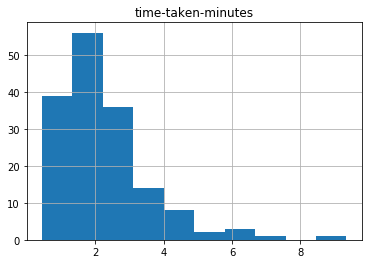

In [3]:
df = df.loc[df['time-taken-minutes'] <= 10]
df.hist('time-taken-minutes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123f87c90>]],
      dtype=object)

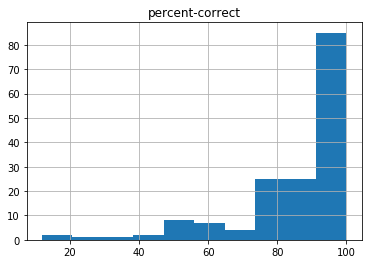

In [4]:
df.hist('percent-correct')

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1240d6d50>]],
      dtype=object)

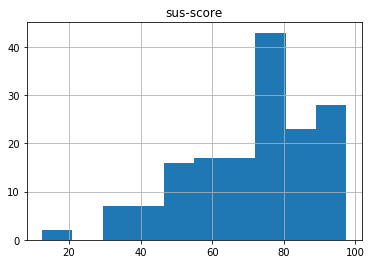

In [5]:
df.hist('sus-score')

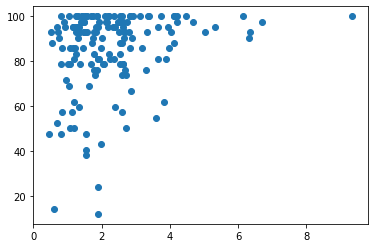

In [6]:
plt.scatter(df['time-taken-minutes'], df['percent-correct'])

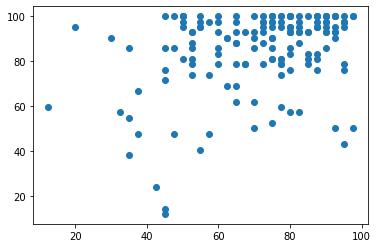

In [7]:
plt.scatter(df['sus-score'], df['percent-correct'])

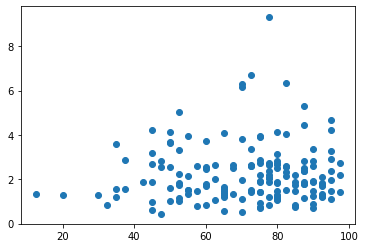

In [8]:
plt.scatter(df['sus-score'], df['time-taken-minutes'])

In [9]:
# Create linear regression object
X = df[['time-taken-minutes']]
Y = df[['percent-correct']]
model_Simple = sm.OLS(Y, X).fit()
model = sm.OLS(Y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        percent-correct   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     8.806
Date:                Tue, 25 Feb 2020   Prob (F-statistic):            0.00347
Time:                        19:18:11   Log-Likelihood:                -682.40
No. Observations:                 160   AIC:                             1369.
Df Residuals:                     158   BIC:                             1375.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 78.3908      2.701     29.025      0.000      73.057      83.725
time-taken-minutes     3.0726      1.035      2.967      0.003       1.028       5.118
==============================================================================
Omnibus:                       61.154   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.277
Skew:                          -1.693   Prob(JB):                     3.46e-31
Kurtosis:                       6.094   Cond. No.                         5.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
X = df[['time-taken-minutes']]
Y = df[['sus-score']]
model_Simple = sm.OLS(Y, X).fit()
model = sm.OLS(Y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sus-score   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.5362
Date:                Tue, 25 Feb 2020   Prob (F-statistic):              0.465
Time:                        19:18:12   Log-Likelihood:                -686.69
No. Observations:                 160   AIC:                             1377.
Df Residuals:                     158   BIC:                             1384.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 69.5149      2.774     25.058      0.000      64.036      74.994
time-taken-minutes     0.7788      1.064      0.732      0.465      -1.322       2.880
==============================================================================
Omnibus:                       11.323   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.385
Skew:                          -0.680   Prob(JB):                      0.00204
Kurtosis:                       2.907   Cond. No.                         5.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
X = df[['time-taken-minutes']]
Y = df[['percent-correct']]
model_Simple = sm.OLS(Y, X).fit()
model = sm.OLS(Y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        percent-correct   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     8.806
Date:                Tue, 25 Feb 2020   Prob (F-statistic):            0.00347
Time:                        19:18:12   Log-Likelihood:                -682.40
No. Observations:                 160   AIC:                             1369.
Df Residuals:                     158   BIC:                             1375.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 78.3908      2.701     29.025      0.000      73.057      83.725
time-taken-minutes     3.0726      1.035      2.967      0.003       1.028       5.118
==============================================================================
Omnibus:                       61.154   Durbin-Watson:                   2.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.277
Skew:                          -1.693   Prob(JB):                     3.46e-31
Kurtosis:                       6.094   Cond. No.                         5.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

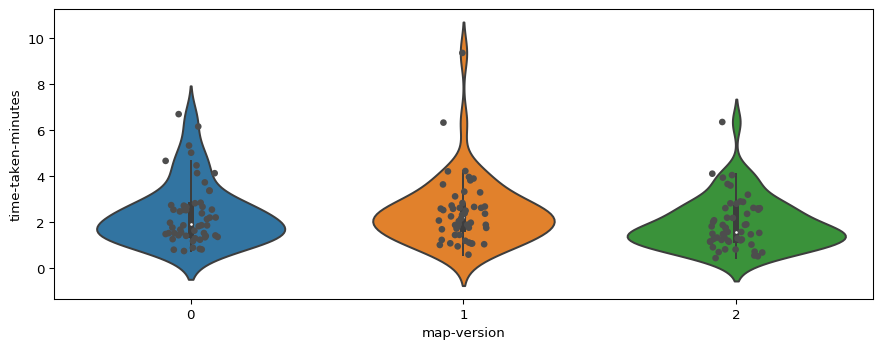

In [12]:
plt.figure(figsize=(11,4), dpi=96)
sns.violinplot(x='map-version',y='time-taken-minutes', data=df)
sns.stripplot(x='map-version',y='time-taken-minutes', color=".3", data=df)

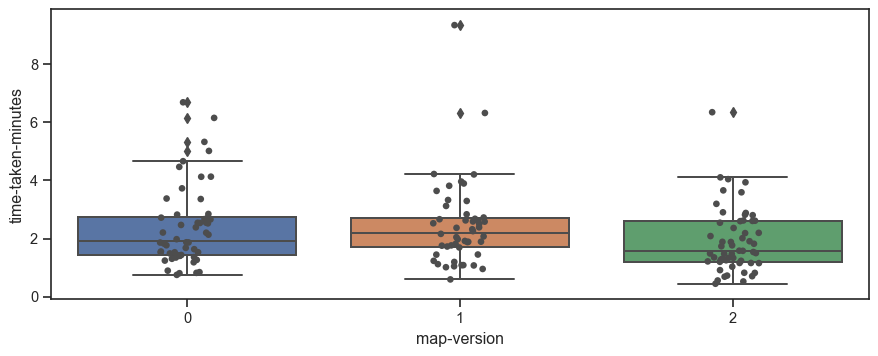

In [28]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='map-version',y='time-taken-minutes', data=df)
sns.stripplot(x='map-version',y='time-taken-minutes', color=".3", data=df)

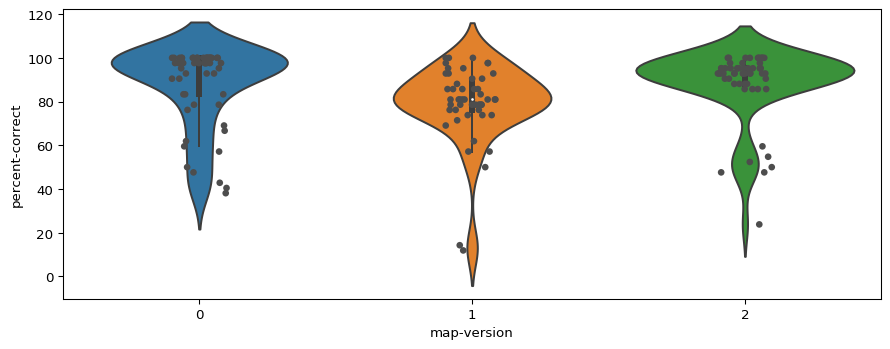

In [13]:
plt.figure(figsize=(11,4), dpi=96)
sns.violinplot(x='map-version',y='percent-correct', data=df)
sns.stripplot(x='map-version',y='percent-correct', color=".3", data=df)

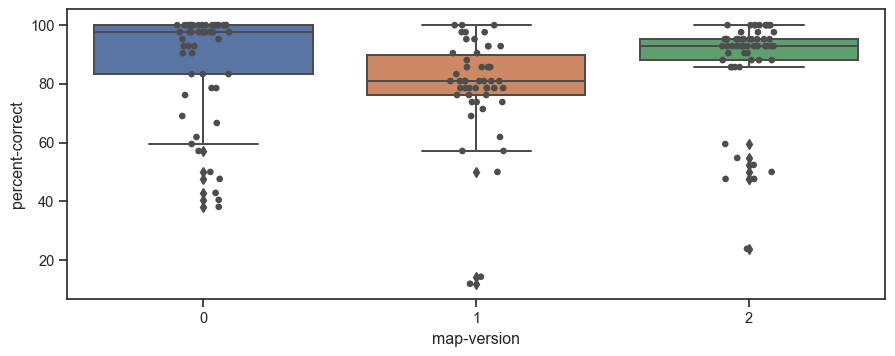

In [33]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='map-version',y='percent-correct', data=df)
sns.stripplot(x='map-version',y='percent-correct', color=".3", data=df)

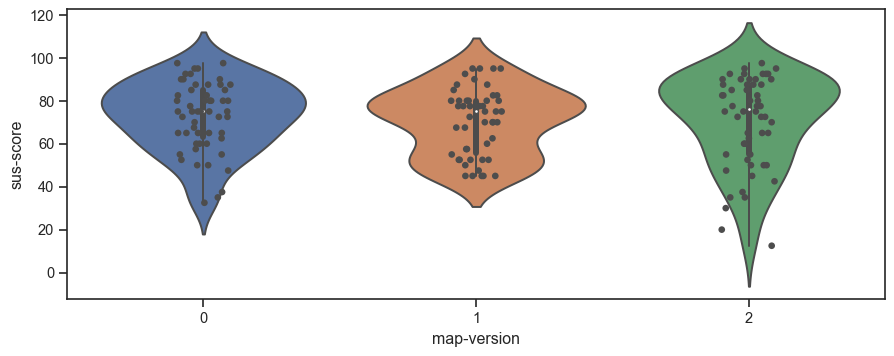

In [34]:
plt.figure(figsize=(11,4), dpi=96)
sns.violinplot(x='map-version',y='sus-score', data=df)
sns.stripplot(x='map-version',y='sus-score', color=".3", data=df)

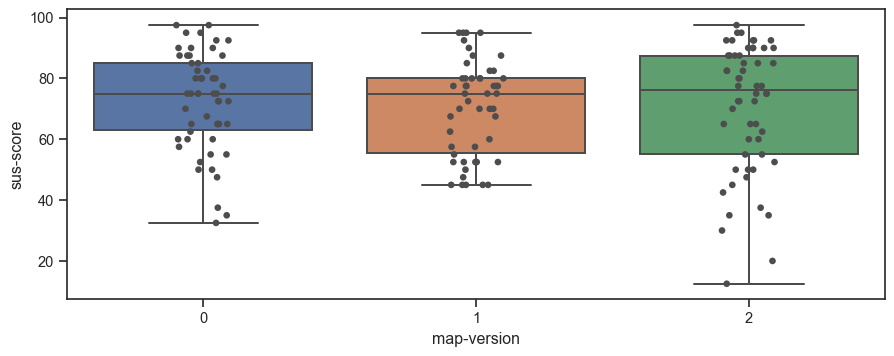

In [35]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='map-version',y='sus-score', data=df)
sns.stripplot(x='map-version',y='sus-score', color=".3", data=df)

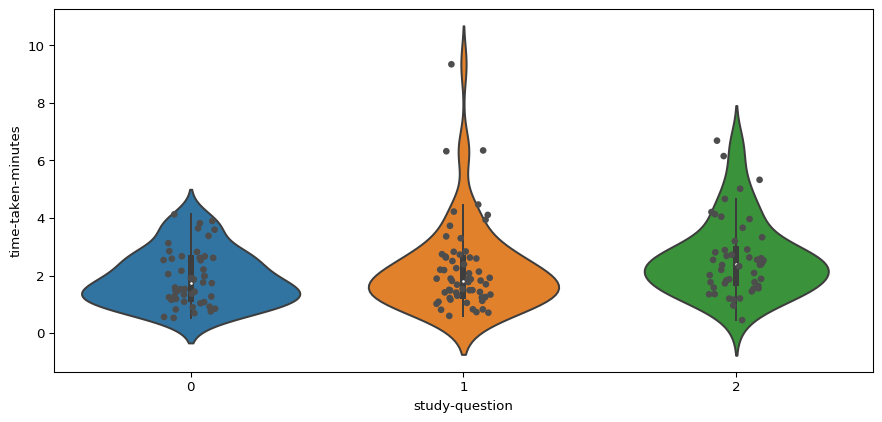

In [15]:
plt.figure(figsize=(11,5), dpi=96)
sns.violinplot(x='study-question',y='time-taken-minutes', data=df)
sns.stripplot(x='study-question',y='time-taken-minutes', color=".3", data=df)

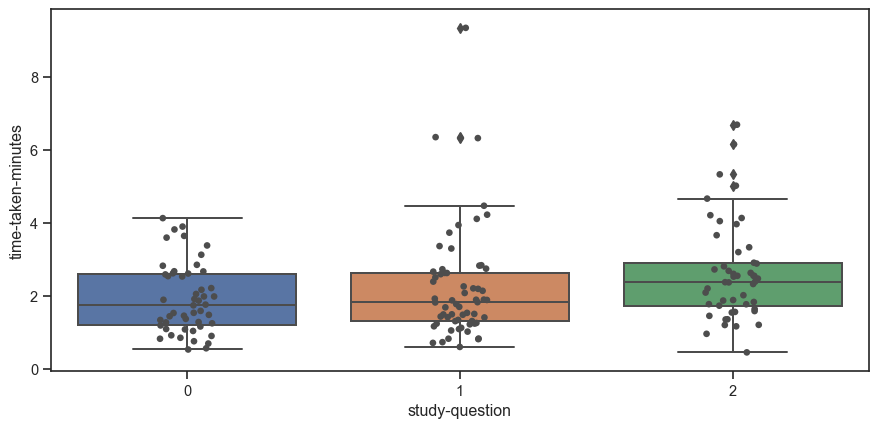

In [38]:
plt.figure(figsize=(11,5), dpi=96)
sns.boxplot(x='study-question',y='time-taken-minutes', data=df)
sns.stripplot(x='study-question',y='time-taken-minutes', color=".3", data=df)

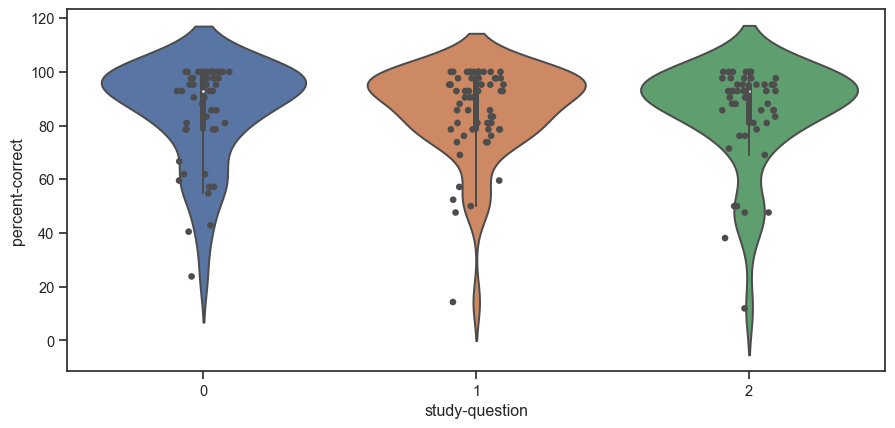

In [37]:
plt.figure(figsize=(11,5), dpi=96)
sns.violinplot(x='study-question',y='percent-correct', data=df)
sns.stripplot(x='study-question',y='percent-correct', color=".3", data=df)

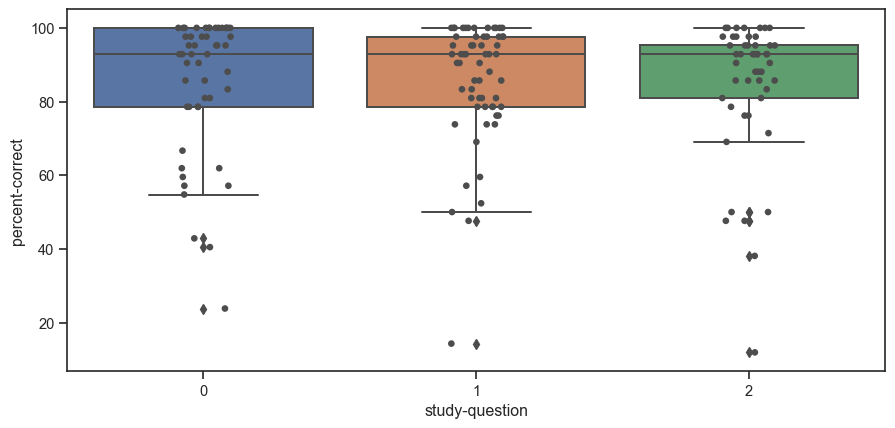

In [39]:
plt.figure(figsize=(11,5), dpi=96)
sns.boxplot(x='study-question',y='percent-correct', data=df)
sns.stripplot(x='study-question',y='percent-correct', color=".3", data=df)

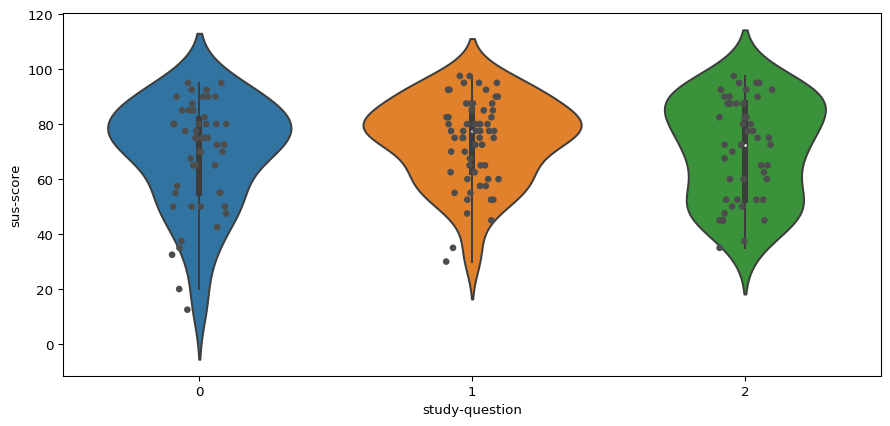

In [16]:
plt.figure(figsize=(11,5), dpi=96)
sns.violinplot(x='study-question',y='sus-score', data=df)
sns.stripplot(x='study-question',y='sus-score', color=".3", data=df)

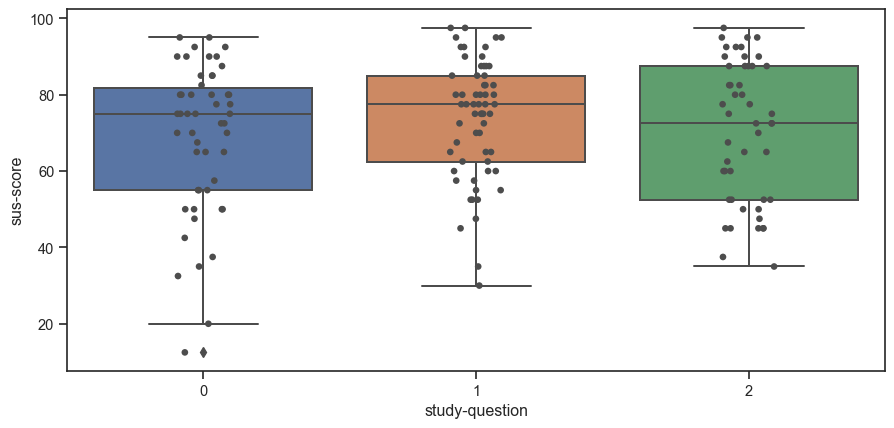

In [40]:
plt.figure(figsize=(11,5), dpi=96)
sns.boxplot(x='study-question',y='sus-score', data=df)
sns.stripplot(x='study-question',y='sus-score', color=".3", data=df)

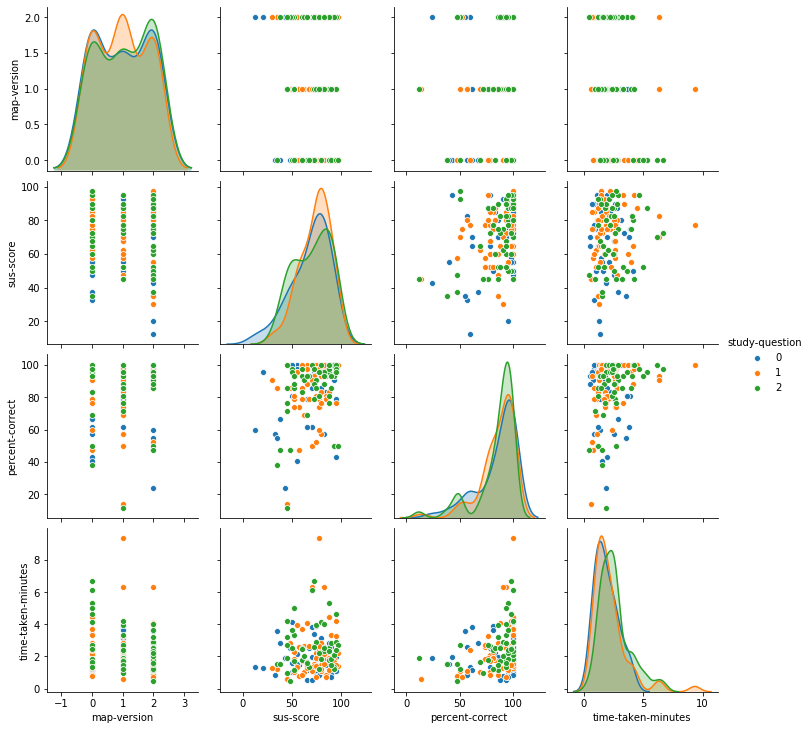

In [17]:
import seaborn as sns
# sns.pairplot(df) 
sns.pairplot(df, hue="study-question")

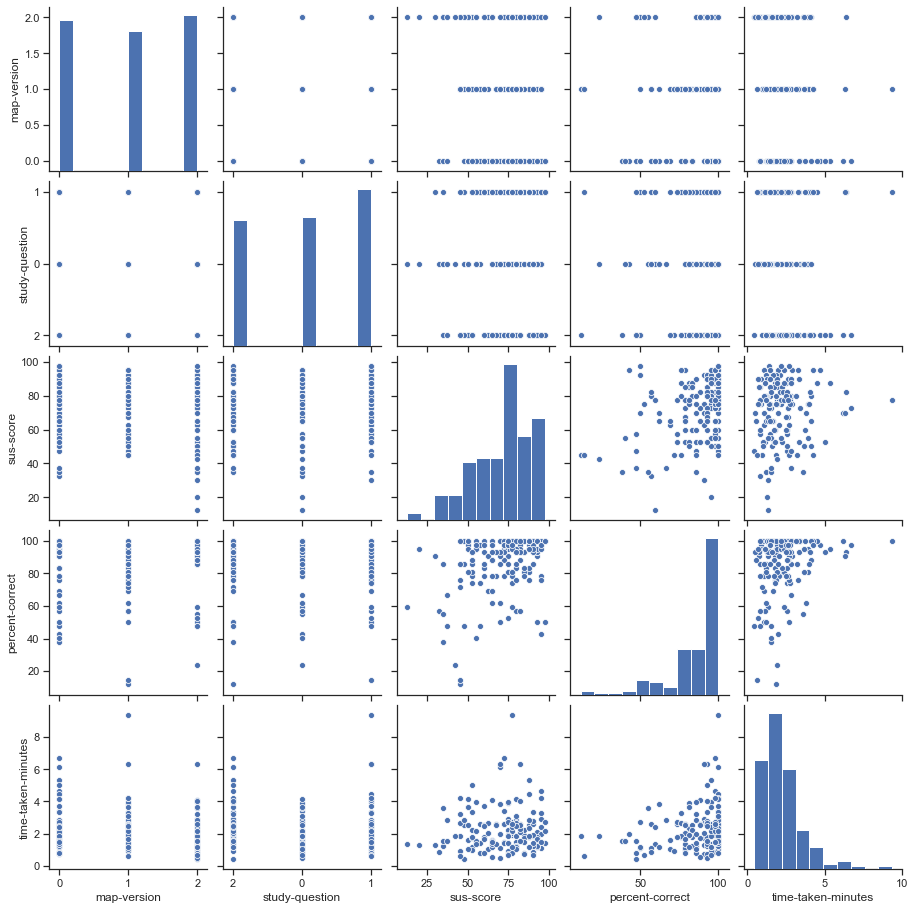

In [18]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)
g

In [19]:
import researchpy as rp
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [20]:
df['study'] = df['study-question'].replace({'0': 'Animate', '1': 'Side by Side', '2': 'Slider'})
statdf = df.loc[:, ('study','time-taken-minutes', 'percent-correct','sus-score')]
statdf = df[['study','sus-score', 'time-taken-minutes', 'percent-correct']]
statdf = statdf.rename(columns={'time-taken-minutes': 'time', 'sus-score': 'sus', 'percent-correct': 'correct'})
statdf

,study,sus,time,correct
188,Slider,70.0,6.152400,100.000000
187,Animate,70.0,3.817233,61.904762
186,Slider,72.5,2.626517,78.571429
185,Animate,12.5,1.335950,59.523810
184,Side by Side,57.5,2.590767,73.809524
...,...,...,...,...
6,Side by Side,60.0,1.696050,78.571429
5,Side by Side,87.5,1.162350,95.238095
3,Slider,65.0,1.580133,92.857143
2,Side by Side,97.5,2.188917,100.000000


In [21]:
# time taken statistics
rp.summary_cont(statdf['time'].groupby(statdf['study']))

,N,Mean,SD,SE,95% Conf.,Interval
study,,,,,,
Animate,50,1.921269,0.950644,0.134441,1.655089,2.187450
Side by Side,61,2.218432,1.521751,0.194840,1.833376,2.603488
Slider,49,2.617704,1.328640,0.189806,2.241829,2.993578


In [22]:
# Accuracy statistics
rp.summary_cont(statdf['correct'].groupby(statdf['study']))

,N,Mean,SD,SE,95% Conf.,Interval
study,,,,,,
Animate,50,85.238095,18.630019,2.634683,80.021690,90.454501
Side by Side,61,85.792350,16.334370,2.091402,81.659184,89.925516
Slider,49,84.742468,18.841383,2.691626,79.412210,90.072726


In [23]:
# SUS Score taken statistics
rp.summary_cont(statdf['sus'].groupby(statdf['study']))

,N,Mean,SD,SE,95% Conf.,Interval
study,,,,,,
Animate,50,68.750000,19.712539,2.787774,63.230489,74.269511
Side by Side,61,73.811475,15.489288,1.983200,69.892145,77.730806
Slider,49,70.663265,18.291445,2.613064,65.488586,75.837945


In [24]:
print('Study and Time')

# Time taken statistics
stats_table = rp.summary_cont(statdf['time'].groupby(statdf['study']))

print('Stats Table')
print(stats_table)
print('')

#one way nova
oneway_table = stats.f_oneway(statdf['time'][statdf['study'] == 'Animate'],
             statdf['time'][statdf['study'] == 'Side by Side'],
             statdf['time'][statdf['study'] == 'Slider'])

print('oneway Table')
print(oneway_table)
print('')

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('time ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table')
print(anova_table)
print('')
# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['time'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')

# The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.
# When the P-value is non significant we fail to reject null hypothesis and conclude that data is drawn from normal distribution.
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk test normal distribution of residuals')
print(w, pvalue)
print('')

#Levene test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
# center : {‘mean’, ‘median’, ‘trimmed'}
# Three variations of Levene’s test are possible. The possibilities and their recommended usages are:
# ‘median’ : Recommended for skewed (non-normal) distributions>
# ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
# ‘trimmed’ : Recommended for heavy-tailed distributions.
# p-value of Levene's test is less than some significance level (typically 0.05), 
#    the obtained differences in sample variances are unlikely to have occurred based on random sampling 
#   from a population with equal varian
print('Levene test for equal variances')
levene = stats.levene(statdf['time'][statdf['study'] == 'Animate'],
             statdf['time'][statdf['study'] == 'Side by Side'],
             statdf['time'][statdf['study'] == 'Slider']) 
print(levene)

Study and Time


Stats Table
               N      Mean        SD        SE  95% Conf.  Interval
study                                                              
Animate       50  1.921269  0.950644  0.134441   1.655089  2.187450
Side by Side  61  2.218432  1.521751  0.194840   1.833376  2.603488
Slider        49  2.617704  1.328640  0.189806   2.241829  2.993578

oneway Table
F_onewayResult(statistic=3.5413319610684892, pvalue=0.031311285489044764)

ANOVA Table
              sum_sq     df         F    PR(>F)
C(study)   12.088334    2.0  3.541332  0.031311
Residual  267.959691  157.0       NaN       NaN

Tukey adhoc
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
     Animate Side by Side   0.2972 0.4613 -0.2926 0.8869  False
     Animate       Slider   0.6964 0.0238   0.075 1.3179   True
Side by Side       Slider   0.3993 0.2519 -0.1938 0.9

In [25]:
print('Study and Correctness')

# Correctness taken statistics
stats_table = rp.summary_cont(statdf['correct'].groupby(statdf['study']))

print('Stats Table')
print(stats_table)
print('')

#one way nova
oneway_table = stats.f_oneway(statdf['correct'][statdf['study'] == 'Animate'],
             statdf['correct'][statdf['study'] == 'Side by Side'],
             statdf['correct'][statdf['study'] == 'Slider'])

print('oneway Table')
print(oneway_table)
print('')

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('correct ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table')
print(anova_table)
print('')
# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['correct'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')
# The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.
# When the P-value is non significant we fail to reject null hypothesis and conclude that data is drawn from normal distribution.
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk test normal distribution of residuals')
print(w, pvalue)
print('')

#Levene test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
# center : {‘mean’, ‘median’, ‘trimmed'}
# Three variations of Levene’s test are possible. The possibilities and their recommended usages are:
# ‘median’ : Recommended for skewed (non-normal) distributions>
# ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
# ‘trimmed’ : Recommended for heavy-tailed distributions.
# p-value of Levene's test is less than some significance level (typically 0.05), 
#    the obtained differences in sample variances are unlikely to have occurred based on random sampling 
#   from a population with equal varian
print('Levene test for equal variances')
levene = stats.levene(statdf['correct'][statdf['study'] == 'Animate'],
             statdf['correct'][statdf['study'] == 'Side by Side'],
             statdf['correct'][statdf['study'] == 'Slider']) 
print(levene)

Study and Correctness


Stats Table
               N       Mean         SD        SE  95% Conf.   Interval
study                                                                 
Animate       50  85.238095  18.630019  2.634683  80.021690  90.454501
Side by Side  61  85.792350  16.334370  2.091402  81.659184  89.925516
Slider        49  84.742468  18.841383  2.691626  79.412210  90.072726

oneway Table
F_onewayResult(statistic=0.047375391716320985, pvalue=0.9537429371603601)

ANOVA Table
                sum_sq     df         F    PR(>F)
C(study)     30.208838    2.0  0.047375  0.953743
Residual  50055.392069  157.0       NaN       NaN

Tukey adhoc
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj  lower  upper  reject
--------------------------------------------------------------
     Animate Side by Side   0.5543   0.9 -7.5063 8.6148  False
     Animate       Slider  -0.4956   0.9 -8.9891 7.9978  False
Side by Side       Slider  -1.

In [26]:
print('Study and SUS Score')

print('Stats Table')
print(stats_table)
print('')

#one way nova
oneway_table = stats.f_oneway(statdf['sus'][statdf['study'] == 'Animate'],
             statdf['sus'][statdf['study'] == 'Side by Side'],
             statdf['sus'][statdf['study'] == 'Slider'])

print('oneway Table')
print(oneway_table)
print('')
# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('sus ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table')
print(anova_table)
print('')

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('sus ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table')
print(anova_table)
print('')
# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['sus'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')
# The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.
# When the P-value is non significant we fail to reject null hypothesis and conclude that data is drawn from normal distribution.
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk test normal distribution of residuals')
print(w, pvalue)
print('')

#Levene test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
# center : {‘mean’, ‘median’, ‘trimmed'}
# Three variations of Levene’s test are possible. The possibilities and their recommended usages are:
# ‘median’ : Recommended for skewed (non-normal) distributions>
# ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
# ‘trimmed’ : Recommended for heavy-tailed distributions.
# p-value of Levene's test is less than some significance level (typically 0.05), 
#    the obtained differences in sample variances are unlikely to have occurred based on random sampling 
#   from a population with equal varian
print('Levene test for equal variances')
levene = stats.levene(statdf['sus'][statdf['study'] == 'Animate'],
             statdf['sus'][statdf['study'] == 'Side by Side'],
             statdf['sus'][statdf['study'] == 'Slider']) 
print(levene)

Study and SUS Score
Stats Table
               N       Mean         SD        SE  95% Conf.   Interval
study                                                                 
Animate       50  85.238095  18.630019  2.634683  80.021690  90.454501
Side by Side  61  85.792350  16.334370  2.091402  81.659184  89.925516
Slider        49  84.742468  18.841383  2.691626  79.412210  90.072726

oneway Table
F_onewayResult(statistic=1.1570866444619117, pvalue=0.31706711011362326)

ANOVA Table
                sum_sq     df         F    PR(>F)
C(study)    729.560093    2.0  1.157087  0.317067
Residual  49495.400845  157.0       NaN       NaN

ANOVA Table
                sum_sq     df         F    PR(>F)
C(study)    729.560093    2.0  1.157087  0.317067
Residual  49495.400845  157.0       NaN       NaN

Tukey adhoc
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-------------------------------------------------------

In [27]:
time_results = ols('time ~ C(study)', data=statdf).fit()
time_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     3.541
Date:                Tue, 25 Feb 2020   Prob (F-statistic):             0.0313
Time:                        19:18:39   Log-Likelihood:                -268.28
No. Observations:                 160   AIC:                             542.6
Df Residuals:                     157   BIC:                             551.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    1.9213      0.185     10.399      0.000       1.556       2.286
C(study)[T.Side by Side]     0.2972      0.249      1.192      0.235      -0.195       0.789
C(study)[T.Slider]           0.6964      0.263      2.652      0.009       0.178       1.215
==============================================================================
Omnibus:                       79.749   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.094
Skew:                           1.903   Prob(JB):                     1.55e-71
Kurtosis:                       8.868   Cond. No.                         3.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""